# Beispiel Dampfturbine

## Aufgabenstellung

In einer Turbine mit einem Gütegrad von $\eta = 0,8$ wird ein Dampfmassenstrom $\dot m = 100\,\mathrm{kg/s}$ mit einer Temperatur $T_1 = 500\,\mathrm{°C}$ und einem Druck von $p_1 = 15\,\mathrm{MPa}$ bis auf einen Kondensationsdruck von $p_2 = 10\,\mathrm{kPa}$ entspannt. Wie groß ist die abgegebene mechanische Leistung $P_{12}$?

*Hinweis: Änderungen der kinetischen und potentiellen Energien können vernachlässigt werden.*


## Lösung

Zunächst werden die notwendigen Bibliotheken zur Berechnung und zum Erstellen von Diagrammen importiert sowie alle gegebenen Größen als Variablen deklariert.

*Hinweis: Vor Ausführung dieses Notebooks muss die CoolProp Bibliothek installiert werden. Wie dies geht, kann im [Notebook Package_install](Package_install.ipynb) nachgelesen werden.*

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

import CoolProp
from CoolProp.CoolProp import PropsSI, PhaseSI
from CoolProp.Plots import PropertyPlot

import warnings
warnings.filterwarnings('ignore') # disable warnings (don't do this for normal work!)

In [2]:
T1 = 500 + 273.15 # K
p1 = 15e6         # Pa
p2 = 10e3         # Pa
m = 100.0         # kg/s
eta = 0.8

fluid = 'water'

Die mechanische Leistung $P_{12}$ kann aus einer Energiebilanz nach dem 1. Hauptsatz bestimmt werden. Für das vorliegende stoffdurchlässige System mit je einer Ein- und Auslassöffnung ergibt sich unter Vernachlässigung der kinetischen und potentiellen Energien sowie unter Annahme von $\dot Q_{12} = 0$

$$P_{12} = \dot m~(h_2 - h_1)\,.$$

Zur Lösung sind die noch fehlenden spezifischen Enthalpien $h_1$ und $h_2$ zu berechnen.

Für den eintretenden Dampf kann zunächst mit einem Phasentest der Zustand überprüft werden.

In [3]:
PhaseSI('T', T1, 'P', p1, fluid)

'supercritical_gas'

Bei den gegebenen Druck- und Temperaturwerten liegt überhitzter Dampf vor. Der Zustand ist mit $T_1$ und $p_1$ eindeutig charakterisiert, so dass $h_1$ mit der Stoffdatenfunktion bestimmt werden kann.

In [4]:
h1 = PropsSI('H', 'T', T1, 'P', p1, fluid)
h1

3310784.2547794366

Am Austritt muss zunächst $h_{2,rev}$ für den isentropen Vergleichsprozess mit $s_{2,rev} = s_1$ bestimmt werden.

In [5]:
s1 = s2rev = PropsSI('S', 'T', T1, 'P', p1, fluid)
h2rev = PropsSI('H', 'S', s2rev, 'P', p2, fluid)

Für den realen Turbinenaustritt ergibt sich $h_2$ anschließend aus der Definition des Gütegrades

$$\eta_{g,E} = \frac{h_2 - h_1}{h_{2,rev} - h_1}\,.$$

Danach kann die Leistung $P_{12}$ aus der bereits aufgestellten Energiebilanz berechnet werden.

In [6]:
h2 = eta * (h2rev - h1) + h1
s2 = PropsSI('S', 'H', h2, 'P', p2, fluid)

P = m * (h2 - h1)                         # in W (SI-Einheiten!)
print('P12 = {0:1.3f} MW'.format(P/1e6))  # Formatierung/Umrechnung in MW

P12 = -104.105 MW


## Grafische Darstellung

Zur Visualisierung soll der Prozessverlauf grafisch in einem p-s-Diagramm und einem T-s-Diagramm dargestellt werden.

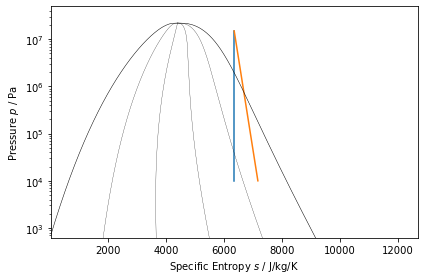

In [7]:
plot = PropertyPlot('water', 'ps', unit_system='SI')
plot.calc_isolines(CoolProp.iQ, num=6)

plot.axis.plot([s1, s2rev], [p1, p2])  # Line Anfangs- bis Endpunkt
plot.axis.plot([s1, s2], [p1, p2])

plot.show()

Für das T-s-Diagramm müssen zunächst die noch unbekannten Turbinenaustrittstemperaturen für den reversiblen und den realen Fall bestimmt werden.

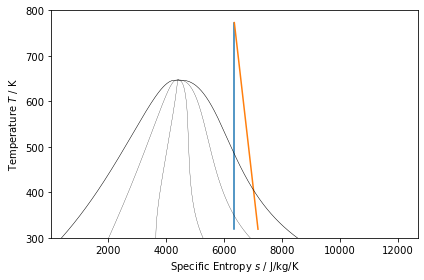

In [8]:
T2rev = PropsSI('T', 'S', s2rev, 'P', p2, fluid)
T2 = PropsSI('T', 'S', s2, 'P', p2, fluid)

plot = PropertyPlot('water', 'Ts', unit_system='SI')
plot.calc_isolines(CoolProp.iQ, num=6)

plot.axis.plot([s1, s2rev], [T1, T2rev])
plot.axis.plot([s1, s2], [T1, T2])

plot.axis.set_ylim(300, 800); plot.show()